# <center>Métodos de Otimização de Sistemas Mecânicos - IM380</center>
# <center> Arthur França Martins </center>

___

Cada solução de capítulo será feita em um tópico separado, no entanto, será necessário rodar o primeiro bloco de *Imports* para importar as bibliotecas empregadas na solução dos problemas.

In [127]:
#Import de bibliotecas utilizadas no decorrer dos exercícios

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Capítulo 3 - Minimização Irrestrita Univariável

## 3.1 Busca Dicotômica

O primeiro exercício consiste em formular o algorítimo para o método supracitado

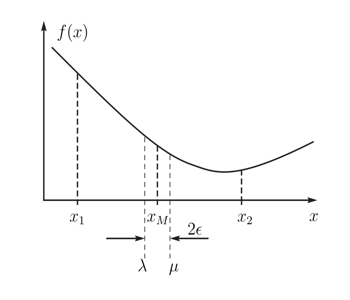

In [128]:
Image.open("BuscaDicotomica.png").resize((350,300))

O método da busca dicotômica consiste na divisão do intervalo de incerteza $[x1, x2]$ ao meio a cada iteração.

O ponto médio do intervalo é dado pela Equação (1).

\begin{equation}
    x_m = \dfrac{x_2 + x_1}{2}
\end{equation}

In [129]:
def f(x,coeficientes):
    '''
    RECEBE UM PONTO X E UMA LISTA DE COEFICIENTES E RETORNA O POLINÔMIO CALCULADO NO PONTO X
    '''
    polinomio = 0
    for count in range(len(coeficientes)):
        polinomio += coeficientes[count] * x ** count
    return (polinomio)

A função *gráfico* consiste apenas em um plot de gráfico customizado visando evitar repetição de tal bloco ao longo desta solução.

In [130]:
def grafico(min, max, coeficientes, funcao = f):
    '''
    RECEBE UM PONTO MÍNIMO, UM MÁXIMO, UMA FUNÇÃO POLINOMIAL E SEUS COEFICIENTES E RETORNA O GRÁFICO DA FUNÇÃO
    '''
    x = np.arange(min,max,0.1)
    plt.figure(figsize=(3, 3))
    plt.plot(x,funcao(x,coeficientes))
    plt.xlabel("X")
    plt.ylabel("f(x)")
    plt.grid()

A função *encontrarMinimo* aplica o método da busca dicotômica bem como plota o gráfico da função fornecida e ainda sinaliza no gráfico as tentativas executadas.

In [174]:

def BuscaDicotomica(x1, x2, coeficientes, erro, funcao = f, max_iteracoes=100):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    grafico(x1, x2, coeficientes)
    plt.title("Gráfico da Função pela Busca Dicotômica")
    iteracoes = 0
    while abs(x1 - x2) >= 1.2*erro or (iteracoes < max_iteracoes):
        xm = (x1+x2)/2
        xMu = xm + erro/2
        xLambda = xm - erro/2
        
        f_mu = funcao(xMu,coeficientes)
        f_lambda = funcao(xLambda,coeficientes)
        
        if f_mu > f_lambda:
            x2 = xMu
        elif f_mu < f_lambda:
            x1 = xLambda
        iteracoes += 1
        
        plt.plot(xm,funcao(xm,coeficientes),'o')
        
    return (x1+x2)/2

O bloco abaixo possui apenas uma chamada simples da função *BuscaDicotomica*

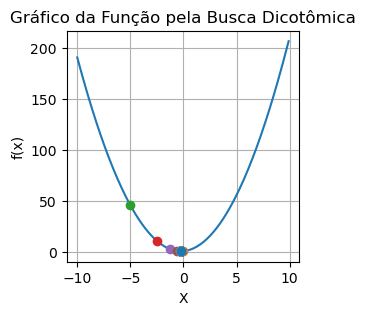

In [176]:
x1 = -10
x2 = 10
erro = 0.001
coeficientes = [1,1,2]

_ = BuscaDicotomica(x1,x2,coeficientes,erro)

# Capítulo 3 - Minimização Irrestrita Univariável

## 3.2 Busca de Fibonacci

A sequência de Fibonacci é dada por ${1, 1, 2, 3, 5, 8, 13, . . ., F_{n-2}, F_{n-1}, (F_{n-2}+ F_{n-1}), . . .}$, ou seja $Fn = F_{n-2} + F_{n-1}$, com $n$ = 3, 4, . . . e $F1$ = $F2$ = 1. Considere o intervalo inicial dado por [$a1$, $b1$] e a notação ilustrada na Figura abaixo.

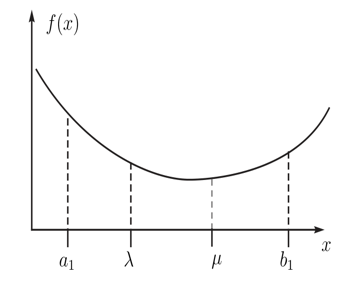

In [133]:
Image.open("fib.png").resize((350,300))

Inicialmente define-se a função *TermoFibonacci* cuja função consiste em retornar o valor de um termo da sequência de Fibonacci *e.g.* o valor $10$ retorna o 10° termo da sequência de valor $55$.

In [2]:
def TermoFibonacci(termo):
    '''
    RECEBE A POSIÇÃO DE UM TERMO DA SEQUÊNCIA DE FIBONACCI E RETORNA O VALOR CORRESPONDENTE
    '''
    if (termo==1) or (termo==2):
        return 1
    else:
        ultimo = 1
        penultimo = 1
        count=3
        while count <= termo:
            atual = ultimo + penultimo
            ultimo = penultimo
            penultimo = atual
            count += 1
        return atual

A função *BuscaFibonacci* aplica o método da busca de Fibonacci bem como plota o gráfico da função fornecida e ainda sinaliza no gráfico as tentativas executadas.

In [184]:
def BuscaFibonacci(x1, x2, coeficientes, termoFib, erro, funcao = f):
    '''
    RECEBE DOIS VALORES, UMA LISTA DE COEFICIENTES E UM ERRO MÁXIMO E RETORNA O VALOR CORRESPONDENTE AO MÍNIMO DA FUNÇÃO 
    UTILIZANDO A BUSCA DICOTÔMICA
    '''
    erro_parada = 1.2*erro
    
    grafico(x1, x2, coeficientes)
    plt.title("Gráfico da Função pela Busca de Fibonacci")
    iteracoes = 1
    
    while (abs(x1-x2)>=erro_parada and (termoFib-iteracoes)>=3):
        
        xm = (x1+x2)/2
        
        aux = termoFib-iteracoes
        FibNKMINUS1 = TermoFibonacci(aux-1)
        FibNK = TermoFibonacci(aux)
        FibNKPLUS1 = TermoFibonacci(aux+1)
        
        Xmu = x1 + (FibNK/FibNKPLUS1)*(x2-x1)
        Xlambda = x1 + (FibNKMINUS1/FibNKPLUS1)*(x2-x1)
        
        if funcao(Xmu,coeficientes) > funcao(Xlambda,coeficientes):
            x2 = Xmu
        elif funcao(Xmu,coeficientes) < funcao(Xlambda,coeficientes):
            x1 = Xlambda
        iteracoes += 1
    
        plt.plot(xm,funcao(xm,coeficientes),'o')
        
    return (x1+x2)/2

O bloco abaixo possui apenas uma chamada simples das funções *BuscaDicotomica* e *BuscaFibonacci* 

Valor mínimo por fibonacci: -0.2500838551716855
Valor mínimo por dicotômica: -0.24999999999998748


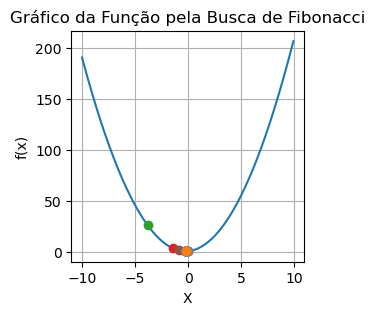

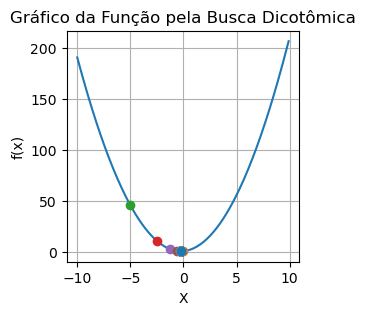

In [185]:
x1 = -10
x2 = 10
erro = 0.001
termoFibonacci = 100
coeficientes = [1,1,2]

print(f'Valor mínimo por fibonacci: {BuscaFibonacci(x1,x2,coeficientes,termoFibonacci,erro)}')
print(f'Valor mínimo por dicotômica: {BuscaDicotomica(x1,x2,coeficientes,erro)}')